<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/7078619/pexels-photo-7078619.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'><strong>EABL STOCK PRICE PREDICTION </strong></span></b> </div> 

### <b> <span style='color:#16C2D5'>|</span> Business Objectives</b>
1. Build a robust time series model leveraging market indicators to forecast future EABL stock prices. 
2. Investigate viability of investing in EABL stock prices. 
3. Build an anomally detection system to identify unusual or unexpected patterns in EABL stock prices. 

In [11]:
import pandas as pd 
import numpy as np
 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [12]:
import pandas as pd
df = pd.read_csv('Data/EABL-2006-2024_JAN_STOCKS.csv')
df.head()

,Date,Open,High,Low,Close,Average,Volume
0,2024-01-31,104.00,111.00,104.0,110.0,106.00,42000
1,2024-01-30,105.00,105.00,101.0,104.0,104.00,15600
2,2024-01-29,105.00,105.00,99.0,103.5,100.00,596100
3,2024-01-26,116.25,116.25,100.0,100.0,104.50,60500
4,2024-01-25,119.75,120.00,118.0,118.0,118.25,5700


In [13]:
####
# Display the column names in your DataFrame
print(df.columns)

Index(['Date ', 'Open', 'High', 'Low', 'Close', 'Average', 'Volume'], dtype='object')


In [14]:
####
# Remove extra space from the 'Date ' column name
df.columns = df.columns.str.strip()

# Convert 'Date' column to datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Display the updated dataset
print(df.head())

              Open    High    Low  Close  Average  Volume
Date                                                     
2024-01-31  104.00  111.00  104.0  110.0   106.00   42000
2024-01-30  105.00  105.00  101.0  104.0   104.00   15600
2024-01-29  105.00  105.00   99.0  103.5   100.00  596100
2024-01-26  116.25  116.25  100.0  100.0   104.50   60500
2024-01-25  119.75  120.00  118.0  118.0   118.25    5700


## EDA

#### 1. VOLATILITY ANALYSIS

In [15]:
volatility = df['Close'].std()
volatility

59.2312405175231

The calculated volatility of 59.23 for the closing prices of EABL stock signifies the average deviation of daily closing prices from their mean. This value indicates a substantial degree of price variability, with an average deviation of approximately 59.23 units (considered in the currency of the stock). Such a level of volatility suggests that EABL stock experiences notable and frequent price fluctuations. It's important to interpret this result in the context of risk assessment, as higher volatility may imply increased uncertainty and potential challenges in predicting future price movements. Investors and analysts should consider this volatility measure along with other risk metrics to form a comprehensive understanding of the stock's historical price dynamics and associated risks.

In [16]:
# Historical volatility
historical_volatility = df['Close'].pct_change().std()
historical_volatility

0.02202943279718737

The historical volatility of approximately 2.2% for the EABL stock means that, on average, the daily percentage change in its closing price over the specified historical period is 2.2%. This measure provides insights into the stock's past price fluctuations, serving as an indicator of its market risk. A higher historical volatility suggests a more variable and potentially riskier market.

In [17]:
# Average True Range
from ta.volatility import AverageTrueRange

atr_window = 30 # The window size as needed
atr = AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=atr_window).average_true_range()

# Print the calculated ATR values needed
print(atr)

Date
2024-01-31    0.000000
2024-01-30    0.000000
2024-01-29    0.000000
2024-01-26    0.000000
2024-01-25    0.000000
                ...   
2006-09-15    6.007073
2006-09-14    5.906837
2006-09-13    5.843276
2006-09-12    5.748500
2006-09-11    5.856883
Name: atr, Length: 4319, dtype: float64


The EABL stock data's computed Average True Range (ATR) values show the degree of market volatility on each matching date. ATR values that are positive indicate rising volatility as you go back in time, whereas values that are negative indicate little to no volatility. This is helpful in figuring out periods of increased market activity and in comprehending previous stock price fluctuations. The ATR values shed light on how market volatility has changed during the historical time that the dataset covers.

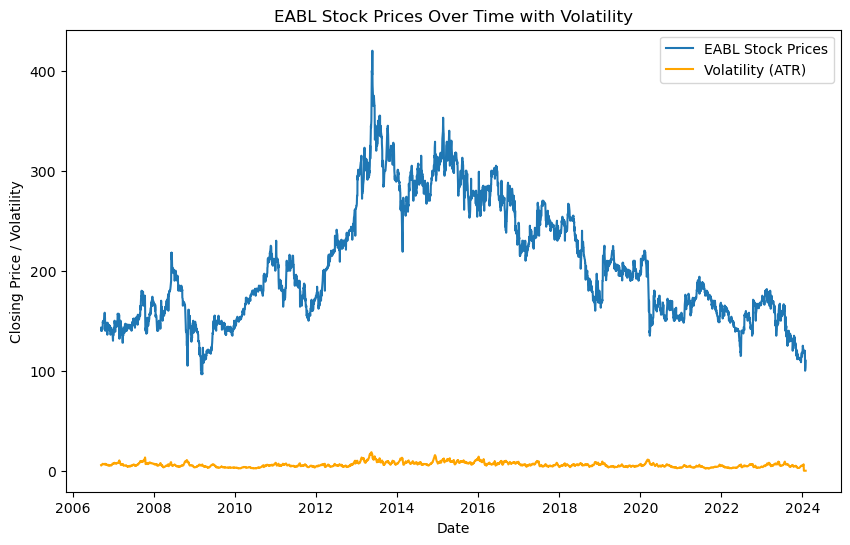

In [18]:
# DataFrame index is a datetime index
df.index = pd.to_datetime(df.index)

# Calculate Average True Range (ATR) for volatility
df['atr'] = AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=14).average_true_range()

# Time series plot with volatility
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='EABL Stock Prices')
plt.plot(df.index, df['atr'], label='Volatility (ATR)', color='orange') 
plt.xlabel('Date')
plt.ylabel('Closing Price / Volatility')
plt.title('EABL Stock Prices Over Time with Volatility')
plt.legend()
plt.show()

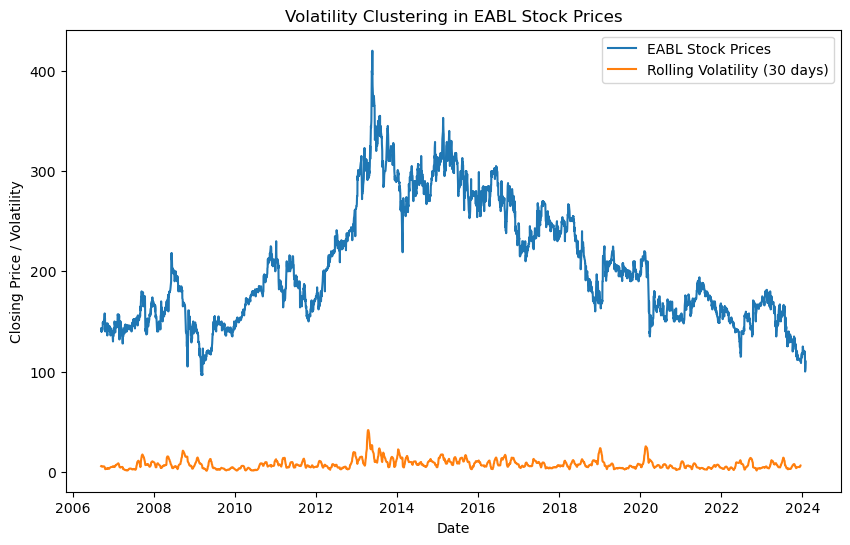

In [19]:
# Volatility clustering plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='EABL Stock Prices')
plt.plot(df.index, df['Close'].rolling(window=30).std(), label='Rolling Volatility (30 days)')
plt.xlabel('Date')
plt.ylabel('Closing Price / Volatility')
plt.title('Volatility Clustering in EABL Stock Prices')
plt.legend()
plt.show()

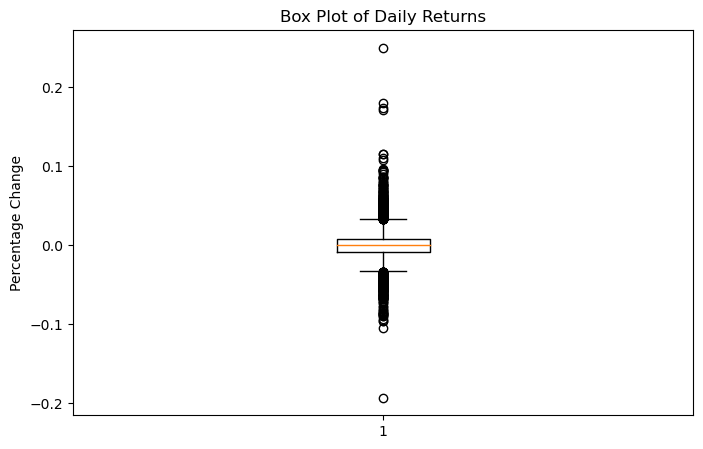

In [26]:
# Daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Box plot for daily returns
plt.figure(figsize=(8, 5))
plt.boxplot(df['Daily_Return'].dropna())
plt.title('Box Plot of Daily Returns')
plt.ylabel('Percentage Change')
plt.show()

### 2. Lagging Analysis

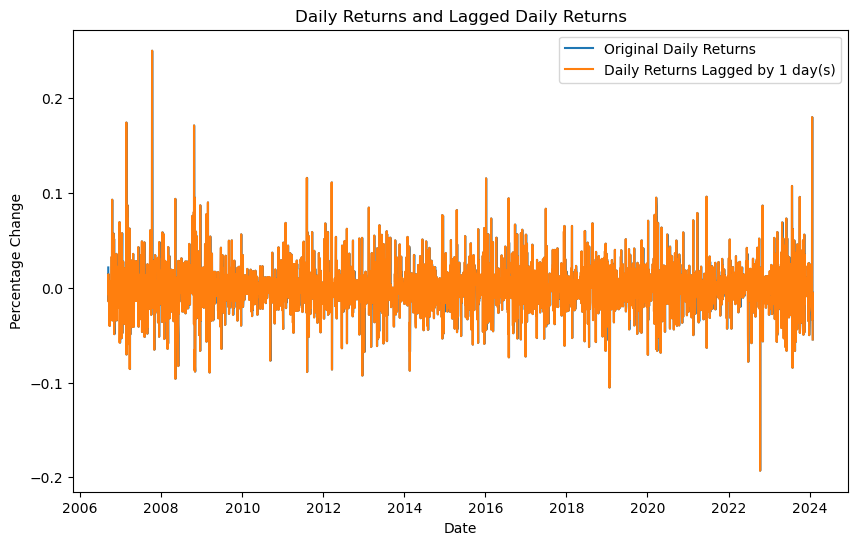

In [21]:
# Assuming df is your DataFrame with 'Close' prices and 'Date' as the index
df['Daily_Return'] = df['Close'].pct_change()

# Specify the lag period
lag_period = 1

# Create lagged version of the 'Daily_Return' column
df['Daily_Return_Lagged'] = df['Daily_Return'].shift(lag_period)

# Plot the original and lagged daily returns
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Daily_Return'], label='Original Daily Returns')
plt.plot(df.index, df['Daily_Return_Lagged'], label=f'Daily Returns Lagged by {lag_period} day(s)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.title(f'Daily Returns and Lagged Daily Returns')
plt.legend()
plt.show()

c:\Users\USER\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


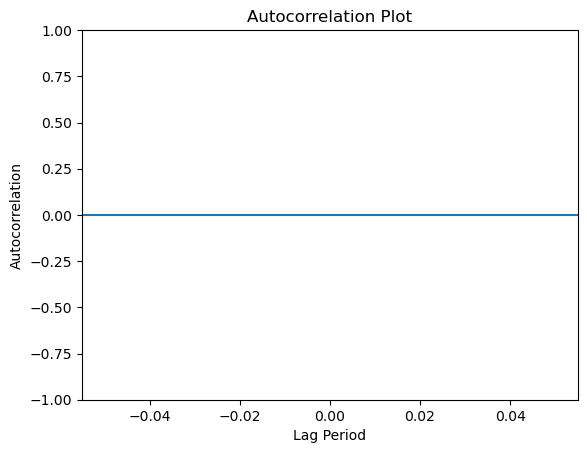

In [22]:
from statsmodels.graphics.tsaplots import plot_acf

# Assuming df is your DataFrame with 'Close' prices and 'Date' as the index
df['Daily_Return'] = df['Close'].pct_change().dropna()

# Plot autocorrelation function
plot_acf(df['Daily_Return'], lags=30)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag Period')
plt.ylabel('Autocorrelation')
plt.show()